In [2]:
original_text = """
Today is our dragon boat festival, in our Chinese culture, to celebrate it with all safe and great in our lives...
"""

reconstructed_a = """
Today is the Dragon Boat Festival in Chinese culture, a celebration of safety and prosperity...
"""

reconstructed_b = """
In Chinese culture, today we celebrate the Dragon Boat Festival, wishing safety and joy...
"""

reconstructed_c = """
Today marks the Dragon Boat Festival in Chinese culture, celebrating life, safety, and happiness...
"""


In [3]:
import textstat

#Text readability report
def get_text_quality_report(text):
    return {
        "Flesch Reading Ease": textstat.flesch_reading_ease(text),
        "Flesch-Kincaid Grade": textstat.flesch_kincaid_grade(text),
        "Gunning Fog Index": textstat.gunning_fog(text),
        "SMOG Index": textstat.smog_index(text),
        "Automated Readability Index": textstat.automated_readability_index(text),
        "Dale-Chall Score": textstat.dale_chall_readability_score(text),
        "Difficult Words": textstat.difficult_words(text),
        "Lexicon Count": textstat.lexicon_count(text),
        "Sentence Count": textstat.sentence_count(text)
    }

In [4]:
texts = {
    "Original": original_text,
    "Reconstructed A": reconstructed_a,
    "Reconstructed B": reconstructed_b,
    "Reconstructed C": reconstructed_c
}

for name, text in texts.items():
    print(f"\n==== {name} ====")
    report = get_text_quality_report(text)
    for metric, value in report.items():
        print(f"{metric}: {value}")


==== Original ====
Flesch Reading Ease: 56.6057142857143
Flesch-Kincaid Grade: 10.580952380952379
Gunning Fog Index: 12.20952380952381
SMOG Index: 11.20814326018867
Automated Readability Index: 10.152857142857144
Dale-Chall Score: 8.43762380952381
Difficult Words: 5
Lexicon Count: 21
Sentence Count: 1

==== Reconstructed A ====
Flesch Reading Ease: 33.690000000000026
Flesch-Kincaid Grade: 12.286666666666669
Gunning Fog Index: 14.0
SMOG Index: 13.023866798666859
Automated Readability Index: 11.503999999999998
Dale-Chall Score: 10.6965
Difficult Words: 6
Lexicon Count: 15
Sentence Count: 1

==== Reconstructed B ====
Flesch Reading Ease: 47.59642857142859
Flesch-Kincaid Grade: 10.098571428571429
Gunning Fog Index: 11.314285714285715
SMOG Index: 11.20814326018867
Automated Readability Index: 11.475000000000001
Dale-Chall Score: 11.098042857142858
Difficult Words: 6
Lexicon Count: 14
Sentence Count: 1

==== Reconstructed C ====
Flesch Reading Ease: 35.5107142857143
Flesch-Kincaid Grade: 11

In [7]:
from sentence_transformers import SentenceTransformer

bert_model = SentenceTransformer('all-MiniLM-L6-v2')  # small but strong

#We use bert in this example
emb_original = bert_model.encode(original_text)
emb_a = bert_model.encode(reconstructed_a)
emb_b = bert_model.encode(reconstructed_b)
emb_c = bert_model.encode(reconstructed_c)

2025-05-15 08:37:43.270514: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747298263.564205      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747298263.642255      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

#Cosine similarity
def cosine_sim(v1, v2):
    return cosine_similarity([v1], [v2])[0][0]

similarity_a = cosine_sim(emb_original, emb_a)
similarity_b = cosine_sim(emb_original, emb_b)
similarity_c = cosine_sim(emb_original, emb_c)

print(f"Similarity (A): {similarity_a:.4f}")
print(f"Similarity (B): {similarity_b:.4f}")
print(f"Similarity (C): {similarity_c:.4f}")

Similarity (A): 0.9614
Similarity (B): 0.9549
Similarity (C): 0.9561


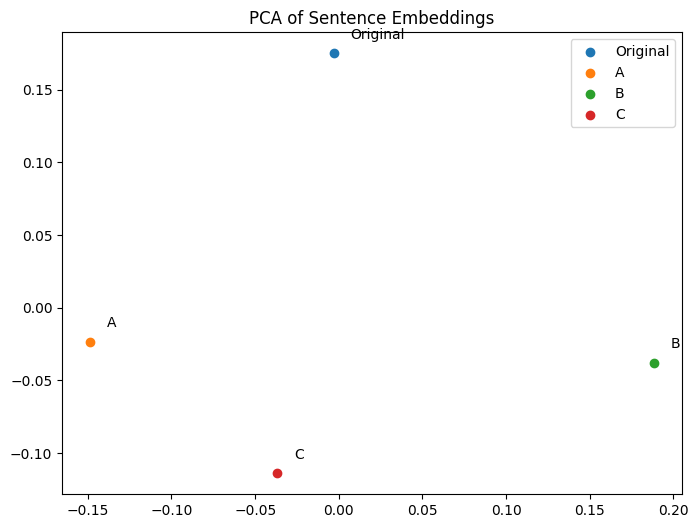

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Use PCA to visualise
embeddings = [emb_original, emb_a, emb_b, emb_c]
labels = ['Original', 'A', 'B', 'C']

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
for point, label in zip(reduced, labels):
    plt.scatter(point[0], point[1], label=label)
    plt.text(point[0]+0.01, point[1]+0.01, label)

plt.title("PCA of Sentence Embeddings")
plt.legend()
plt.show()